In [40]:
import pandas as pd
import matplotlib.pyplot as plt

## Data wrangling and EDA

### a. Import datasets

In [41]:
grc_df = pd.read_csv("data/year_msoa_grocery.csv", index_col="area_id")
grc_df["density"] = grc_df.population / grc_df.area_sq_km
grc_df.head()

,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,volume_perc2.5,...,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km,density
area_id,,,,,,,,,,,,,,,,,,,,,
E02000001,323.180804,35.0,150.0,250.0,400.0,1000.0,323.685705,1.001360,98.849228,13.0,...,6687.0,3697.0,2990.0,1018.0,4349.0,1320.0,43.910124,2.90,2305.862069,2305.862069
E02000002,397.651232,32.5,150.0,300.0,500.0,1020.0,550.434424,6.030232,118.288417,11.0,...,7379.0,3549.0,3830.0,2150.0,4151.0,1078.0,35.567286,2.16,3416.203704,3416.203704
E02000003,371.276702,30.0,140.0,250.0,450.0,1200.0,564.404826,4.398728,118.385615,12.0,...,10720.0,5297.0,5423.0,2762.0,6649.0,1309.0,35.700466,2.14,5009.345794,5009.345794
E02000004,347.481292,29.0,126.0,250.0,430.0,1000.0,479.372575,5.297349,104.435407,11.0,...,6536.0,3119.0,3417.0,1454.0,4044.0,1038.0,38.493115,2.48,2635.483871,2635.483871
E02000005,400.576688,32.5,150.0,296.0,500.0,1050.0,593.021809,5.107669,128.997438,11.0,...,9243.0,4478.0,4765.0,2678.0,5554.0,1011.0,34.156335,1.19,7767.226891,7767.226891


In [42]:
inc_df = pd.read_excel("data/ons-model-based-income-estimates-msoa.xls",
                       sheet_name="2015-16 (annual income)",
                       index_col="MSOA code")
inc_df.head()

,MSOA name,Local authority code,Local authority name,Region code,Region name,Total annual income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£),Net annual income (£),...,Lower confidence limit (£).1,Confidence interval (£).1,Net income before housing costs (£),Upper confidence limit (£).2,Lower confidence limit (£).2,Confidence interval (£).2,Net income after housing costs (£),Upper confidence limit (£).3,Lower confidence limit (£).3,Confidence interval (£).3
MSOA code,,,,,,,,,,,,,,,,,,,,,
E02004297,County Durham 001,E06000047,County Durham,E12000001,North East,35900,45200,28500,16700,27300,...,22100,11700,27600,33300,22800,10400,25600,31000,21200,9800
E02004290,County Durham 002,E06000047,County Durham,E12000001,North East,42500,53600,33700,19900,29800,...,23900,13100,28600,34500,23700,10800,27500,33200,22700,10500
E02004298,County Durham 003,E06000047,County Durham,E12000001,North East,38000,47700,30200,17600,28300,...,22800,12300,28200,34100,23400,10700,26700,32300,22100,10200
E02004299,County Durham 004,E06000047,County Durham,E12000001,North East,33500,42200,26700,15500,26600,...,21600,11200,25500,30800,21100,9700,22400,27100,18500,8700
E02004291,County Durham 005,E06000047,County Durham,E12000001,North East,31700,39800,25200,14600,25500,...,20700,10800,25100,30200,20800,9500,20900,25300,17200,8000


### b. Exploration of the income dataset

The values that we have access to, with there confidence intervals, are:
- Total annual income
- Net annual income
- Net income before housing costs
- Net income after housing costs

In [43]:
# Rename columns to suppress the '£' character
col_names = ['MSOA name', 'Local authority code', 'Local authority name',
       'Region code', 'Region name', 'Total annual income',
       'Upper confidence limit', 'Lower confidence limit',
       'Confidence interval', 'Net annual income',
       'Upper confidence limit.1', 'Lower confidence limit.1',
       'Confidence interval.1', 'Net income before housing costs',
       'Upper confidence limit.2', 'Lower confidence limit.2',
       'Confidence interval.2', 'Net income after housing costs',
       'Upper confidence limit.3', 'Lower confidence limit.3',
       'Confidence interval.3']
inc_df.columns = col_names

In [44]:
# Number of different local authorities
inc_df["Local authority name"].unique().shape[0]

348

In [45]:
# Number of different regions
inc_df["Region name"].unique().shape[0]

10

### c. Join datasets

In [46]:
areas = set(grc_df.index).intersection(set(inc_df.index))
print(f"There are {len(grc_df)} areas in the Tesco dataset.")
print(f"{len(areas)} of them appear in the income dataset.")

There are 983 areas in the Tesco dataset.
983 of them appear in the income dataset.


(The numbers above are good news)

In [47]:
df = grc_df.join(inc_df, how="inner")
df.shape

(983, 223)

### d. EDA

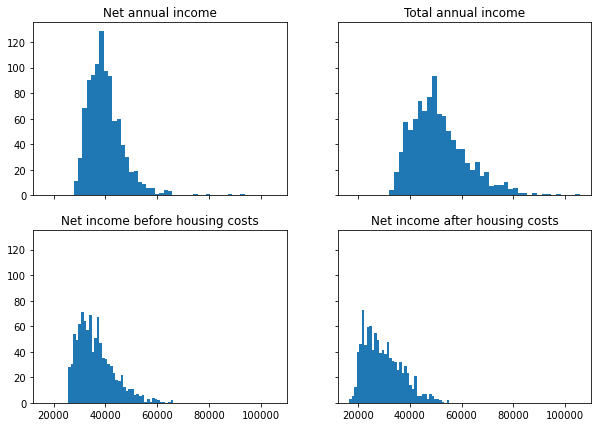

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(10,7), sharex=True, sharey=True)
income_types = ["Net annual income", "Total annual income",
                "Net income before housing costs",
                "Net income after housing costs"]
for i in range(4):
    ax = axes[i//2, i%2]
    title = income_types[i]
    ax.set_title(title)
    data = df[title]
    ax.hist(data, bins=40)
plt.show()

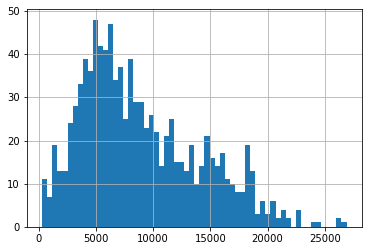

In [49]:
df["density"].hist(bins=60)
plt.show()

In [50]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


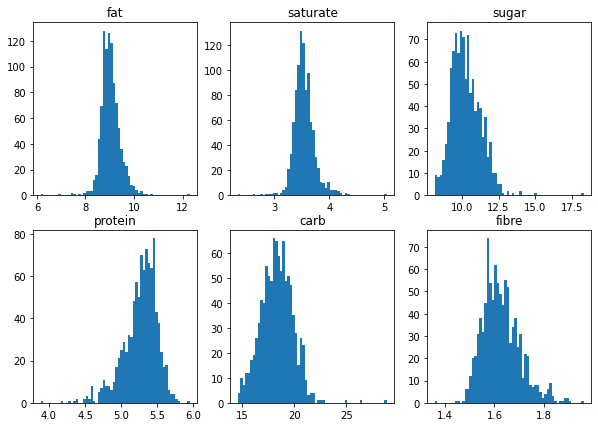

In [51]:
fig, axes = plt.subplots(2, 3, figsize=(10,7))
nutrients = ["fat", "saturate", "sugar", "protein", "carb", "fibre"]
for i in range(6):
    ax = axes[i//3, i%3]
    title = nutrients[i]
    ax.set_title(title)
    data = df[title]
    ax.hist(data, bins=60)
plt.show()

### Correlation between income and food consumption

In [52]:
import seaborn as sns
from scipy import stats

#### Correlation between income and population density

In [53]:
density_income=df[['Local authority name', 'density', 'Net income before housing costs']].set_index('Local authority name').groupby('Local authority name').agg('mean')
print('Population density within areas and incomes are not correlated:', stats.spearmanr(density_income['density'],density_income['Net income before housing costs']))

Population density within areas and incomes are not correlated: SpearmanrResult(correlation=-0.05046791443850268, pvalue=0.7803099810395576)


#### Correlation between income and food regime

In [54]:
a=df[['fat','saturate','salt','sugar','protein','carb','fibre','alcohol','Local authority name','Net income after housing costs']].reset_index().drop(['index'], axis=1).set_index('Local authority name').groupby('Local authority name')
aggregated=a.agg('mean').sort_values('Net income after housing costs')
aggregated.head()

,fat,saturate,salt,sugar,protein,carb,fibre,alcohol,Net income after housing costs
Local authority name,,,,,,,,,
Newham,9.378723,3.743317,0.565351,10.718722,4.970339,19.368346,1.529773,0.186041,21440.540541
Brent,9.055837,3.605774,0.560172,10.269214,5.077129,18.562989,1.602791,0.212904,23626.470588
Barking and Dagenham,9.249121,3.578964,0.596171,10.902509,5.190453,19.922489,1.587418,0.197174,23681.818182
Hackney,8.864995,3.433912,0.592322,9.781322,5.192300,17.652942,1.599429,0.225516,25432.142857
Waltham Forest,9.090611,3.628137,0.605651,9.960162,5.355338,18.357426,1.565373,0.237687,25657.142857


##### Correlation between income and nutrients for different ares

In [55]:
list(df.columns)

['weight',
 'weight_perc2.5',
 'weight_perc25',
 'weight_perc50',
 'weight_perc75',
 'weight_perc97.5',
 'weight_std',
 'weight_ci95',
 'volume',
 'volume_perc2.5',
 'volume_perc25',
 'volume_perc50',
 'volume_perc75',
 'volume_perc97.5',
 'volume_std',
 'volume_ci95',
 'fat',
 'fat_perc2.5',
 'fat_perc25',
 'fat_perc50',
 'fat_perc75',
 'fat_perc97.5',
 'fat_std',
 'fat_ci95',
 'saturate',
 'saturate_perc2.5',
 'saturate_perc25',
 'saturate_perc50',
 'saturate_perc75',
 'saturate_perc97.5',
 'saturate_std',
 'saturate_ci95',
 'salt',
 'salt_perc2.5',
 'salt_perc25',
 'salt_perc50',
 'salt_perc75',
 'salt_perc97.5',
 'salt_std',
 'salt_ci95',
 'sugar',
 'sugar_perc2.5',
 'sugar_perc25',
 'sugar_perc50',
 'sugar_perc75',
 'sugar_perc97.5',
 'sugar_std',
 'sugar_ci95',
 'protein',
 'protein_perc2.5',
 'protein_perc25',
 'protein_perc50',
 'protein_perc75',
 'protein_perc97.5',
 'protein_std',
 'protein_ci95',
 'carb',
 'carb_perc2.5',
 'carb_perc25',
 'carb_perc50',
 'carb_perc75',
 'car

In [56]:
bool = df["Local authority name"].isin(["Greenwich",'Wandsworth','Hackney']) 
sample_analysis=df[bool]

C:\Users\touch\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Alcohol vs. Income')

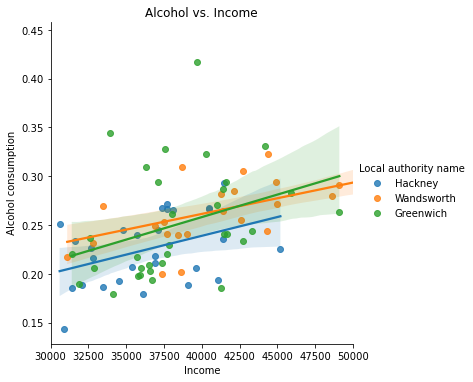

In [57]:
income_health_columns=['fat','saturate','salt','sugar','protein','carb','fibre','alcohol','Net annual income','Local authority name']
income_health=sample_analysis[income_health_columns].sort_values('Net annual income', ascending = True)

sns.lmplot('Net annual income','alcohol', data=income_health, hue='Local authority name').set(xlim=(30000, 50000))
plt.ylabel(" Alcohol consumption")
plt.xlabel("Income")
plt.title('Alcohol vs. Income')

The above example shows the change in alcohol consumption for different areas as income increases. A generalized illustration of the trend is found below

C:\Users\touch\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


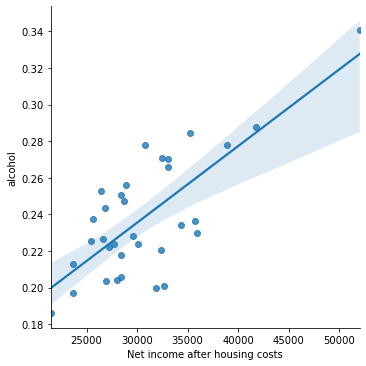

In [58]:
sns.lmplot('Net income after housing costs',aggregated.columns[7], data=aggregated)


Is alcohol consumption correlated with income?

A strong and significant correlation exists between alcohol and income since p<0.05

<AxesSubplot:xlabel='nutrient', ylabel='rho'>

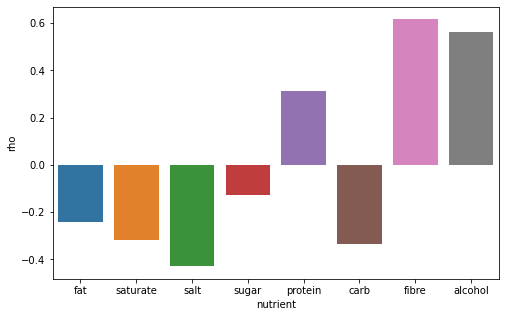

In [59]:
rows=[]
for i in range (0, len(aggregated.columns)-1):
    a=stats.spearmanr(aggregated[aggregated.columns[i]],aggregated['Net income after housing costs'])
    rows.append([aggregated.columns[i],a[0],a[1]])
income_regime=pd.DataFrame(rows, columns=['nutrient','rho','p value'])
plt.figure(figsize=(8,5))
sns.barplot(x='nutrient', y='rho', data=income_regime)

#### Food regimes variation in incomes and population densities

In [60]:
df['density'].describe()


count      983.000000
mean      8848.057579
std       5137.854481
min        288.324421
25%       4958.203822
50%       7720.000000
75%      12197.183484
max      26905.405405
Name: density, dtype: float64

Accordingly, low density areas are classified between 288 and 4958.
medium density areas are classified between 4958 and 12197.
high density areas are classified above 26905

In [61]:
low_inc_low_density_df=df[(df["Net annual income"] >= 27800) & (df["Net annual income"] <= 35000) & (df["density"] <=4958.2)]
low_inc_med_density_df=df[(df["Net annual income"] >= 27800) & (df["Net annual income"] <= 35000) & (df["density"] >4958.2) & (df["density"] <=12197) ]
low_inc_high_density_df=df[(df["Net annual income"] >= 27800) & (df["Net annual income"] <= 35000) & (df["density"] >12197) ]

med_inc_low_density_df = df[(df["Net annual income"] >35000) & (df["Net annual income"] <= 43150)  & (df["density"] <=4958.2)]
med_inc_med_density_df = df[(df["Net annual income"] >35000) & (df["Net annual income"] <= 43150)  & (df["density"] >4958.2) & (df["density"] <=12197) ]
med_inc_high_density_df = df[(df["Net annual income"] >35000) & (df["Net annual income"] <= 43150)  & (df["density"] >12197) ]

high_inc_low_density_df=df[(df["Net annual income"] >43150) & (df["density"] <=4958.2)]
high_inc_med_density_df=df[(df["Net annual income"] >43150) & (df["density"] >4958.2) & (df["density"] <=12197) ]
high_inc_high_density_df=df[(df["Net annual income"] >43150) & (df["density"] >12197) ]

In [62]:
nutrient_cols=['fat','saturate','salt','sugar','protein','carb','fibre','alcohol', 'Local authority name','density']

In [63]:
low_inc_low_density_nutrient=low_inc_low_density_df[nutrient_cols].reset_index().drop(['index'], axis=1).set_index('Local authority name').groupby('Local authority name')
agg_low_inc_low_density_nutrient=low_inc_low_density_nutrient.agg('mean')

low_inc_med_density_nutrient=low_inc_med_density_df[nutrient_cols].reset_index().drop(['index'], axis=1).set_index('Local authority name').groupby('Local authority name')
agg_low_inc_med_density_nutrient=low_inc_med_density_nutrient.agg('mean')

low_inc_high_density_nutrient=low_inc_high_density_df[nutrient_cols].reset_index().drop(['index'], axis=1).set_index('Local authority name').groupby('Local authority name')
agg_low_inc_high_density_nutrient=low_inc_high_density_nutrient.agg('mean')

In [64]:
med_inc_low_density_nutrient=med_inc_low_density_df[nutrient_cols].reset_index().drop(['index'], axis=1).set_index('Local authority name').groupby('Local authority name')
agg_med_inc_low_density_nutrient=med_inc_low_density_nutrient.agg('mean')

med_inc_med_density_nutrient=med_inc_med_density_df[nutrient_cols].reset_index().drop(['index'], axis=1).set_index('Local authority name').groupby('Local authority name')
agg_med_inc_med_density_nutrient=med_inc_med_density_nutrient.agg('mean')

med_inc_high_density_nutrient=med_inc_high_density_df[nutrient_cols].reset_index().drop(['index'], axis=1).set_index('Local authority name').groupby('Local authority name')
agg_med_inc_high_density_nutrient=med_inc_high_density_nutrient.agg('mean')

In [65]:
high_inc_low_density_nutrient=high_inc_low_density_df[nutrient_cols].reset_index().drop(['index'], axis=1).set_index('Local authority name').groupby('Local authority name')
agg_high_inc_low_density_nutrient=high_inc_low_density_nutrient.agg('mean')

high_inc_med_density_nutrient=high_inc_med_density_df[nutrient_cols].reset_index().drop(['index'], axis=1).set_index('Local authority name').groupby('Local authority name')
agg_high_inc_med_density_nutrient=high_inc_med_density_nutrient.agg('mean')

high_inc_high_density_nutrient=high_inc_high_density_df[nutrient_cols].reset_index().drop(['index'], axis=1).set_index('Local authority name').groupby('Local authority name')
agg_high_inc_high_density_nutrient=high_inc_high_density_nutrient.agg('mean')

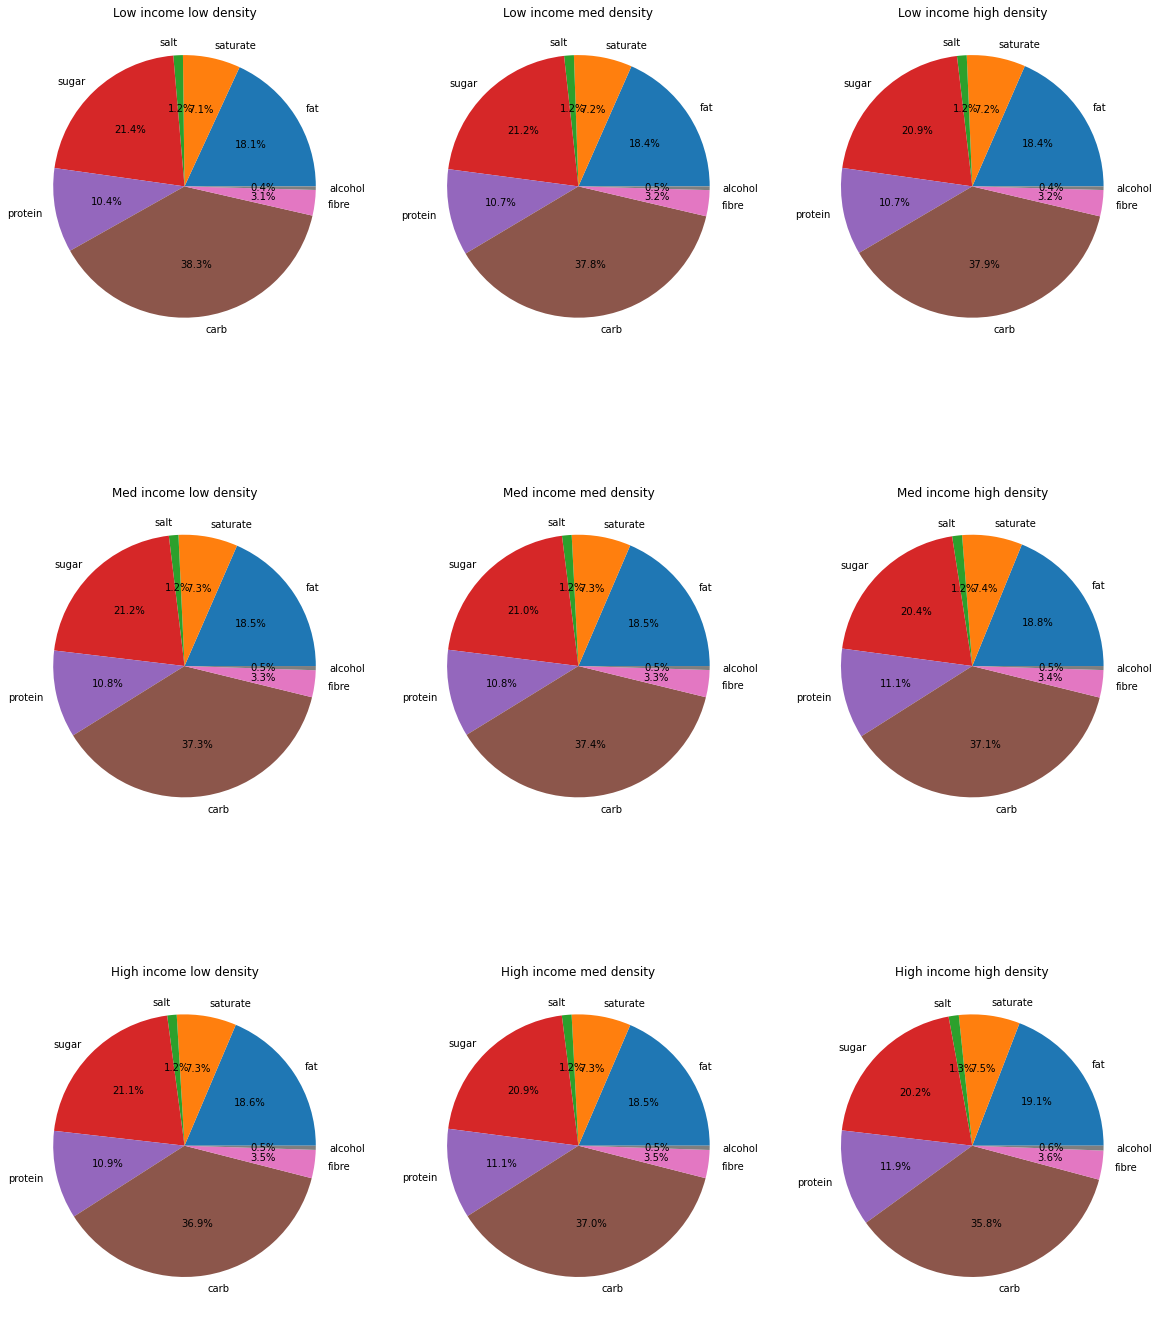

In [66]:
fig = plt.figure(figsize=(20,25))
ax1 = plt.subplot2grid((3,3),(0,0))
plt.pie(agg_low_inc_low_density_nutrient[nutrient_cols[:-2]].mean(axis=0),labels=nutrient_cols[:-2],autopct='%1.1f%%')
plt.title('Low income low density')

ax1 = plt.subplot2grid((3,3), (0, 1))
plt.pie(agg_low_inc_med_density_nutrient[nutrient_cols[:-2]].mean(axis=0),labels=nutrient_cols[:-2],autopct='%1.1f%%')
plt.title('Low income med density')

ax1 = plt.subplot2grid((3,3), (0, 2))
plt.pie(agg_low_inc_high_density_nutrient[nutrient_cols[:-2]].mean(axis=0),labels=nutrient_cols[:-2],autopct='%1.1f%%')
plt.title('Low income high density')

ax1 = plt.subplot2grid((3,3),(1,0))
plt.pie(agg_med_inc_low_density_nutrient[nutrient_cols[:-2]].mean(axis=0),labels=nutrient_cols[:-2],autopct='%1.1f%%')
plt.title('Med income low density')

ax1 = plt.subplot2grid((3,3), (1, 1))
plt.pie(agg_med_inc_med_density_nutrient[nutrient_cols[:-2]].mean(axis=0),labels=nutrient_cols[:-2],autopct='%1.1f%%')
plt.title('Med income med density')

ax1 = plt.subplot2grid((3,3), (1, 2))
plt.pie(agg_med_inc_high_density_nutrient[nutrient_cols[:-2]].mean(axis=0),labels=nutrient_cols[:-2],autopct='%1.1f%%')
plt.title('Med income high density')

ax1 = plt.subplot2grid((3,3),(2,0))
plt.pie(agg_high_inc_low_density_nutrient[nutrient_cols[:-2]].mean(axis=0),labels=nutrient_cols[:-2],autopct='%1.1f%%')
plt.title('High income low density')

ax1 = plt.subplot2grid((3,3), (2, 1))
plt.pie(agg_high_inc_med_density_nutrient[nutrient_cols[:-2]].mean(axis=0),labels=nutrient_cols[:-2],autopct='%1.1f%%')
plt.title('High income med density')

ax1 = plt.subplot2grid((3,3), (2, 2))
plt.pie(agg_high_inc_high_density_nutrient[nutrient_cols[:-2]].mean(axis=0),labels=nutrient_cols[:-2],autopct='%1.1f%%')
plt.title('High income high density')

plt.show()

#### Food regimes variation in income

In [67]:
low_inc_df=df[(df["Net annual income"] >= 27800) & (df["Net annual income"] <= 35000)]
med_inc_df = df[(df["Net annual income"] >35000) & (df["Net annual income"] <= 43150)]
high_inc_df=df[(df["Net annual income"] >43150)]

In [68]:
low_inc_nutrient=low_inc_df[nutrient_cols].reset_index().drop(['index'], axis=1).set_index('Local authority name').groupby('Local authority name')
agg_low_inc_nutrient=low_inc_nutrient.agg('mean')

med_inc_nutrient=med_inc_df[nutrient_cols].reset_index().drop(['index'], axis=1).set_index('Local authority name').groupby('Local authority name')
agg_med_inc_nutrient=med_inc_nutrient.agg('mean')

high_inc_nutrient=high_inc_df[nutrient_cols].reset_index().drop(['index'], axis=1).set_index('Local authority name').groupby('Local authority name')
agg_high_inc_nutrient=high_inc_nutrient.agg('mean')

Text(0.5, 1.0, 'high income')

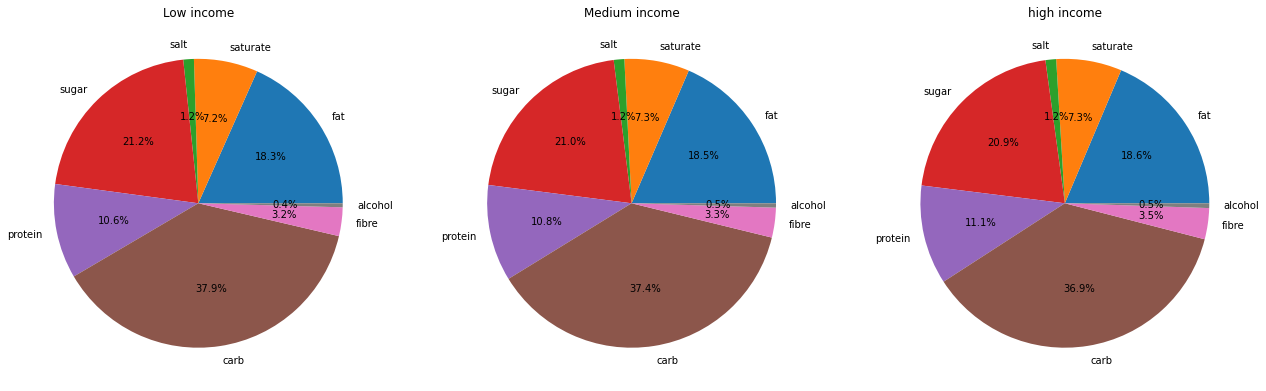

In [69]:
fig = plt.figure(figsize=(22,25))
ax1 = plt.subplot2grid((1,3),(0,0))
plt.pie(agg_low_inc_nutrient[nutrient_cols[:-2]].mean(axis=0),labels=nutrient_cols[:-2],autopct='%1.1f%%')
plt.title('Low income')

ax1 = plt.subplot2grid((1,3), (0, 1))
plt.pie(agg_med_inc_nutrient[nutrient_cols[:-2]].mean(axis=0),labels=nutrient_cols[:-2],autopct='%1.1f%%')
plt.title('Medium income')

ax1 = plt.subplot2grid((1,3), (0, 2))
plt.pie(agg_high_inc_nutrient[nutrient_cols[:-2]].mean(axis=0),labels=nutrient_cols[:-2],autopct='%1.1f%%')
plt.title('high income')


In [70]:
food_cols=['f_beer','f_dairy',
 'f_eggs',
 'f_fats_oils',
 'f_fish',
 'f_fruit_veg',
 'f_grains',
 'f_meat_red',
 'f_poultry',
 'f_readymade',
 'f_sauces',
 'f_soft_drinks',
 'f_spirits',
 'f_sweets',
 'f_tea_coffee',
 'f_water',
 'f_wine',
 'f_dairy_weight',
 'f_eggs_weight',
 'f_fats_oils_weight',
 'f_fish_weight',
 'f_fruit_veg_weight',
 'f_grains_weight',
 'f_meat_red_weight','f_poultry_weight', 'f_readymade_weight', 'f_sauces_weight','f_sweets_weight', 'Local authority name', 'density']

In [71]:
low_inc_df=df[(df["Net annual income"] >= 27800) & (df["Net annual income"] <= 35000)]
med_inc_df = df[(df["Net annual income"] >35000) & (df["Net annual income"] <= 43150)]
high_inc_df=df[(df["Net annual income"] >43150)]

In [72]:
low_inc_nutrient=low_inc_df[food_cols].reset_index().drop(['index'], axis=1).set_index('Local authority name').groupby('Local authority name')
agg_low_inc_nutrient=low_inc_nutrient.agg('mean')

med_inc_nutrient=med_inc_df[food_cols].reset_index().drop(['index'], axis=1).set_index('Local authority name').groupby('Local authority name')
agg_med_inc_nutrient=med_inc_nutrient.agg('mean')

high_inc_nutrient=high_inc_df[food_cols].reset_index().drop(['index'], axis=1).set_index('Local authority name').groupby('Local authority name')
agg_high_inc_nutrient=high_inc_nutrient.agg('mean')

## Change in income affects what food types?

In [73]:
import seaborn as sns

rows=[]
   
for i in range(0, 27):
     rows.append([agg_high_inc_nutrient.columns[i], agg_low_inc_nutrient.mean(axis=0)[i], agg_med_inc_nutrient.mean(axis=0)[i],agg_high_inc_nutrient.mean(axis=0)[i]])
portion=pd.DataFrame(rows, columns=['food type', 'low income','medium income', 'high income']).set_index('food type')

In [74]:
new=portion.round(4)*100
new.head(27)

low_inc_pref=[]
high_inc_pref=[]
for i in range(0, len(new)):
    if (new['low income'][i] < new['medium income'][i]) & (new['medium income'][i] < new['high income'][i]):
        low_inc_pref.append(new.index[i]) 
    if (new['medium income'][i] < new['low income'][i]) & (new['high income'][i] < new['medium income'][i]):
        high_inc_pref.append(new.index[i])
        
        
new=new.transpose()




rows=[]

for i in range(0, len(agg_high_inc_nutrient.mean(axis=0))-1):
    rows.append([agg_high_inc_nutrient.columns[i], agg_high_inc_nutrient.mean(axis=0)[i], 'high'])
for i in range(0,len(agg_med_inc_nutrient.mean(axis=0))-1):
    rows.append([agg_med_inc_nutrient.columns[i],agg_med_inc_nutrient.mean(axis=0)[i], 'medium']) 
for i in range(0,len(agg_low_inc_nutrient.mean(axis=0))-1):
    rows.append([agg_low_inc_nutrient.columns[i],agg_low_inc_nutrient.mean(axis=0)[i], 'low']) 
        #agg_med_inc_nutrient.mean(axis=0)[i],agg_high_inc_nutrient.mean(axis=0)[i]])
portion_new=pd.DataFrame(rows, columns=['food type', 'portion', 'income'])

In [76]:
high_food_columns=['fats_oils','grains','soft_drinks','sweets']
high_income_high_food=portion_new.set_index('food type').transpose()[high_inc_pref].transpose().reset_index()
high_income_high_food['food']=high_income_high_food['food type'].str.replace('f_', '')
high_income_high_food=high_income_high_food.set_index('food').transpose()[high_income_columns].transpose().reset_index()




s=[]
for i in range(0, len(high_income_columns)):
    
    s.append([high_income_columns[i],high_income_high_food[high_income_high_food['food']==high_food_columns[i]]['portion'].max()])

j=pd.DataFrame(s,columns=['food','max'])


import numpy as np
high_income_high_food_merged=high_income_high_food.merge(j, on=['food'])
high_income_high_food_merged['percentage']=high_income_high_food_merged['portion']/high_income_high_food_merged['max']*100
np.round(high_income_high_food_merged,2)

NameError: name 'high_income_columns' is not defined

In [ ]:

sns.catplot(x="income", y="percentage", col="food", col_wrap=4, data=high_income_high_food_merged, 
            kind="bar", orient="v",
           height=2,  aspect=2, sharey=False, sharex= False)

plt.show()

In [ ]:
low_food_columns=['beer','fish','fruit_veg','wine']
s=[]
for i in range(0, len(low_income_columns)):
    
    s.append([low_income_columns[i],high_income_low_food[high_income_low_food['food']==low_food_columns[i]]['portion'].max()])

j=pd.DataFrame(s,columns=['food','max'])

high_income_low_food_merged=high_income_low_food.merge(j, on=['food'])
high_income_low_food_merged['percentage']=high_income_low_food_merged['portion']/high_income_low_food_merged['max']*100
np.round(high_income_low_food_merged,2)

In [ ]:
high_income_low_food=portion_new.set_index('food type').transpose()[low_inc_pref].transpose().reset_index()
high_income_low_food['food']=high_income_low_food['food type'].str.replace('f_', '')
high_income_low_food=high_income_low_food.set_index('food').transpose()[low_income_columns].transpose().reset_index()
sns.catplot(x="income", y='percentage', col="food", col_wrap=4, data=high_income_low_food_merged, 
            kind="bar", orient="v",
           height=2,  aspect=2.0, sharey=False, sharex=False)
plt.show()
